# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun the notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

<hr style="height:2pt">

In [2]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Question 7 optional imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)
  - [Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]](#part4questions)


- [**PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 5:   Investigating relationships of SimplyMarry.com reported attributes [25 pts]](#part5questions)
  - [Question 6:  Calculate the Gini coefficient [15 pts]](#part6questions)
  - [Question 7 (required for 209a students, optional for others):  Multi-linear regression [10 pts]](#part7questions)


## About this homework

This assignment is the first where we will go through the process of loading a dataset, splitting it in train and test sets, pre-processing it, and finally running models and evaluating our results.

We have two different datasets, one with car data in [**PART 1**](#part1) and another with data from an Indian matrimonial web site in [**PART 2**](#part2). Using these datasets, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

**PLEASE NOTE:** [Question 4](#part4questions) and [Question 7](#part7questions) are **required for 209a students** and are **optional for 109a students**. 109a students are welcome to complete Q4 and Q7, if time permits, for your own learning experience. However, neither Q4 nor Q7 will be graded for 109a students and neither will not count toward your grade. On the otherhand, 209a students MUST complete Q4 and Q7, and both questions will be graded.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of kilometers that the cars have been driven?

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**
    
**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

</div>

In [3]:
# your code here
car = pd.read_csv("data/car_dekho_full.csv")
car.head()
car.dtypes

Year                       int64
Current_Selling_Price    float64
MRP                      float64
Kms_Driven                 int64
dtype: object

**INTERPRETATION:**

**Four variables are identified above. All of them are quantitative, because "year" and "Kms_Driven" have "int64" data type, "Current_Selling_Price" and "MRP" have "float64" data type. There is no categorical variable. I think "Year" should be a date object, which is a special type of categorical variable.**


<div class='exercise-r'>  

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

</div>

In [4]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function

# your code here
mean_csp = car[['Current_Selling_Price','MRP']].agg(['mean', 'std']).iloc[0,0]
mean_mrp = car[['Current_Selling_Price','MRP']].agg(['mean', 'std']).iloc[0,1]
std_csp = car[['Current_Selling_Price','MRP']].agg(['mean', 'std']).iloc[1,0]
std_mrp = car[['Current_Selling_Price','MRP']].agg(['mean', 'std']).iloc[1,1]
# end your code here 

print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


<div class='exercise-r'>  

**1.3** What is the range of kilometers that the cars have been driven?

</div>

In [5]:
# your code here
q1_3 = car['Kms_Driven'].max() - car['Kms_Driven'].min()
print(f"The range of kilometers that the cars have been driven is {q1_3} km.")

The range of kilometers that the cars have been driven is 212500 km.


<div class='exercise-r'>  

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

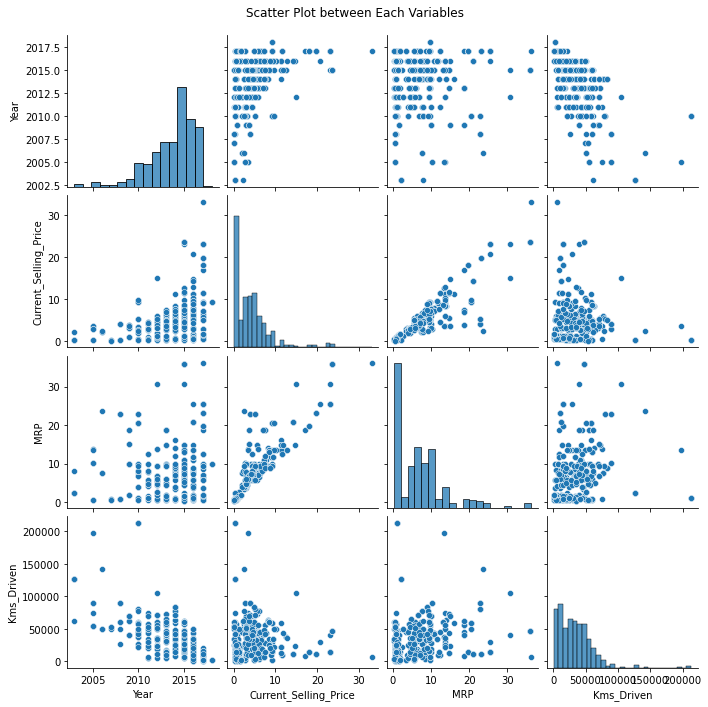

In [6]:
# your code here
q1_4p = sns.pairplot(car)
q1_4p.fig.suptitle('Scatter Plot between Each Variables')
q1_4p.fig.subplots_adjust(top=0.94)

**INTERPRETATION:**

**MRP visually seems to best predict the Current_Selling_Price, because there is a clear positive relationship between MRP and Current_Selling_Price.**


<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We begin our modeling with k-Nearest Neighbors (kNN) regression. For this, we will use `sklearn`'s built-in functions.

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.

- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 
- **2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)
- **2.2.3** Find the best model based on the test $MSE$ values.
- **2.2.4** Evaluate and report the $R^2$ of the best model.


**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.3.1** How does the value of $k$ affect the fitted model?
- **2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  
- **2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
- **2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

</div>

In [7]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(car[['MRP']].values,
                                                    car['Current_Selling_Price'].values, 
                                                    train_size = 0.75, random_state = 109)

<div class='exercise-r'>  

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.
    
- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

</div>

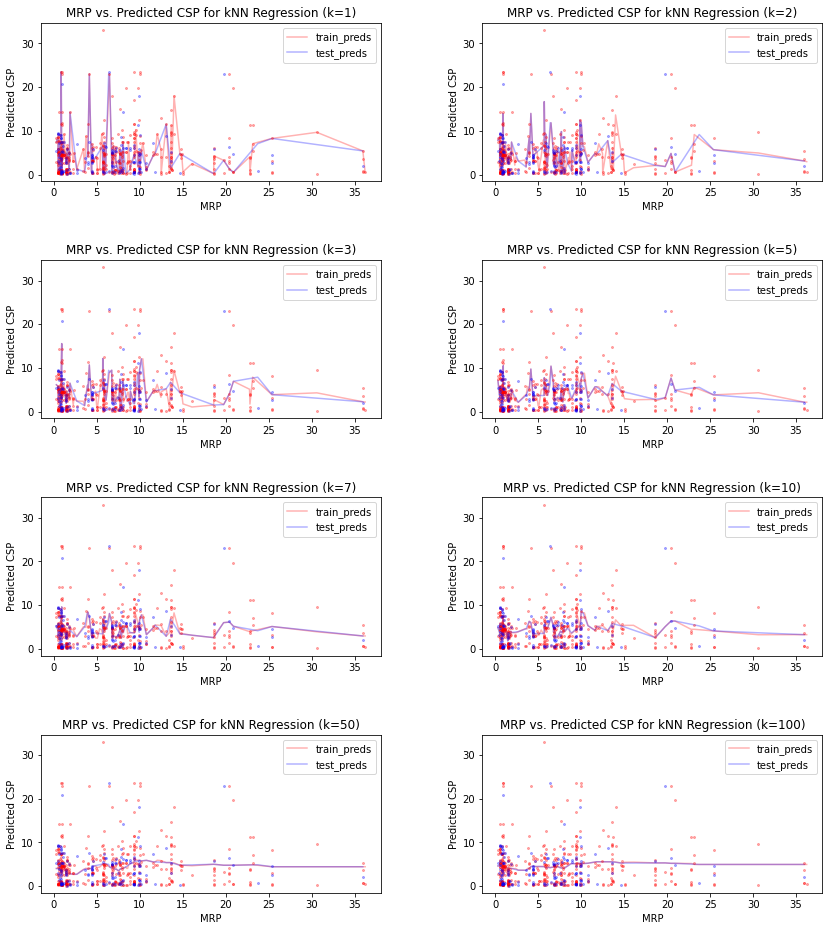

In [16]:
fig, axs = plt.subplots(4,2, figsize=(14, 16))
fig.subplots_adjust(hspace = .5, wspace=.3)

# your code here
Ks = [1,2,3,5,7,10,50,100]
x_axs = [0,0,1,1,2,2,3,3]
y_axs = [0,1,0,1,0,1,0,1]
for k in Ks:
    neighbors = KNeighborsRegressor(n_neighbors = k)
    neighbors.fit(X_train, y_train)
    test_preds = neighbors.predict(X_test)
    train_preds = neighbors.predict(X_train)

    # helper for plots
    idx_train = np.argsort(X_train[:,0])
    X_train = X_train[idx_train]
    train_preds = train_preds[idx_train]
    idx_test = np.argsort(X_test[:,0])
    X_test = X_test[idx_test]
    test_preds = test_preds[idx_test]
    
    # plots
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].plot(X_train, train_preds, 
                                                    'r-', markersize = 2, 
                                                    alpha = 0.3, label = "train_preds")
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].plot(X_test, test_preds, 
                                                    'b-', markersize = 2, 
                                                    alpha = 0.3, label = "test_preds")
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].plot(X_train, y_train, 
                                                    'ro', markersize = 2, 
                                                    alpha = 0.3)
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].plot(X_test, y_test, 
                                                    'bo', markersize = 2, 
                                                    alpha = 0.3)
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].set_xlabel('MRP')
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].set_ylabel('Predicted CSP')
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].set_title(f'MRP vs. Predicted CSP for kNN Regression (k={k})')
    axs[x_axs[Ks.index(k)],y_axs[Ks.index(k)]].legend()
    

<div class='exercise-r'>  

**2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)

</div>

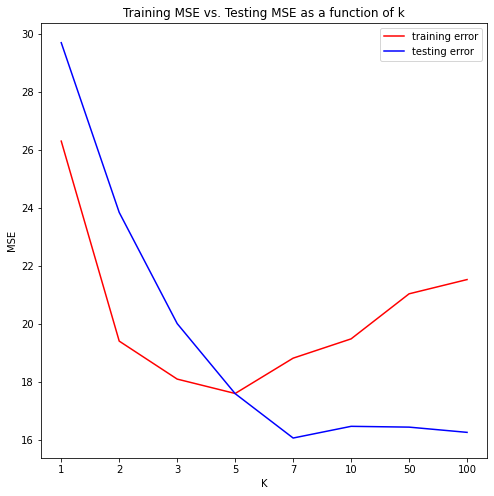

In [9]:
# your code here
Ks = [1,2,3,5,7,10,50,100]
train_error = []
test_error = []
for k in Ks:
    
    neighbors = KNeighborsRegressor(n_neighbors = k)
    neighbors.fit(X_train, y_train)
    train_preds = neighbors.predict(X_train)
    test_preds = neighbors.predict(X_test)

    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)
    
    train_error.append(mse_train)
    test_error.append(mse_test)
    
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(range(len(Ks)), train_error, color="red", label="training error" )
ax.plot(range(len(Ks)), test_error, color="blue", label="testing error" )
ax.set_title(f'Training MSE vs. Testing MSE as a function of k')
ax.set_xlabel('K')
ax.set_ylabel('MSE')
plt.xticks(range(len(Ks)), Ks)
ax.legend()

<div class='exercise-r'>  

**2.2.3** Find the best model based on the test $MSE$ values.

</div>

In [10]:
# your code here
q223 = Ks[test_error.index(min(test_error))]
print(f"The best model is the kNN model using k = {q223} with the lowest test MSE values.")

The best model is the kNN model using k = 7 with the lowest test MSE values.


<div class='exercise-r'>  

**2.2.4** Evaluate and report the $R^2$ of the best model.

</div>

In [11]:
# your code here
k_testbest=7
neighbors = KNeighborsRegressor(n_neighbors = k_testbest)
neighbors.fit(X_train, y_train)
r2_test = neighbors.score(X_test,y_test)
print(f"R2 for testing set is {r2_test:.5f}.")

R2 for testing set is 0.00196.


<div class='exercise-r'>  

**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

**2.3.1** How does the value of $k$ affect the fitted model?

</div>

**Increasing k will first decrease the error made by the fitted model then increase the error. When k=1, the model is too simple. When k=100 the model will simply be the mean the nearest 100 neighbors.**



<div class='exercise-r'>  

**2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?

</div>

**When k=n, the kNN model is a straight line with y value equals to the mean of all of the observations.**


<div class='exercise-r'>  

**2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

</div>

**Yes, the trends are different. As k increases, the training MSE decreases and then increases a lot, while the test MSE values decreases and then increase a little bit. When the k=1, the test MSE is higher than training MSE. When the k=100, the test MSE is lower than training MSE.**


<div class='exercise-r'>  

**2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

</div>

**No. I get different answer. When I set random_state=10, the best model is the kNN model with k=100. Also, the trends of training and test MSE are different than before. I think the answer is by chance due to randomness.**

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

- **3.1.1** Run a linear regression model.
- **3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.
- **3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.
- **3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

**NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- **3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

- **3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- **3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

**3.1.1** Run a linear regression model.

- **NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions.

</div>

In [12]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(car[['MRP']].values,
                                                    car['Current_Selling_Price'].values, 
                                                    train_size = 0.75, random_state = 109)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
train_preds = lreg.predict(X_train)
test_preds = lreg.predict(X_test)

<div class='exercise-r'>  

**3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.

</div>

In [13]:
# your code here
lreg_coef = lreg.coef_
lreg_intercept = lreg.intercept_
print(f"The coeffcient is {lreg_coef[0]:.3f}, and the intercept is {lreg_intercept:.3f}.")

The coeffcient is 0.616, and the intercept is 0.112.


<div class='exercise-r'>  

**3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.

</div>

In [14]:
# your code here 
lreg_mse_test = mean_squared_error(test_preds,y_test)
lreg_mse_train = mean_squared_error(train_preds,y_train)
lreg_r2 = lreg.score(X_test,y_test)
print(f"The MSE for training set is {lreg_mse_train:.3f}.")
print(f"The MSE for test set is {lreg_mse_test:.3f}.")
print(f"The R2 for test set is {lreg_r2:.3f}.")

The MSE for training set is 4.713.
The MSE for test set is 3.136.
The R2 for test set is 0.805.


<div class='exercise-r'>  

**3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

</div>

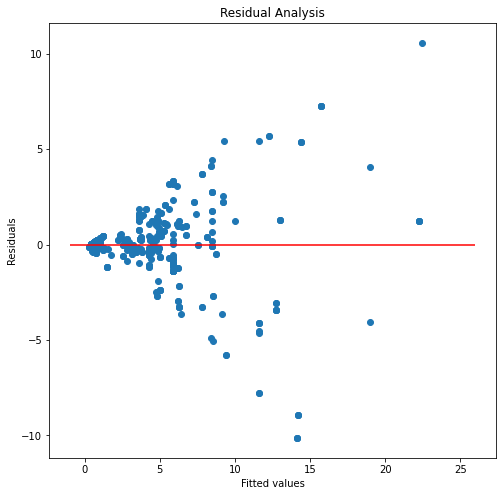

In [15]:
# your code here 
residuals = y_train - train_preds
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(train_preds,residuals)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residual Analysis")
ax.hlines(0, -1, 26, color = "red")

<div class='exercise-r'>  

**3.2** Discuss your results by answering the following questions.

**3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression?

</div>

**The MSE score is much smaller than the best test MSE value obtained with kNN regression.**


<div class='exercise-r'>  

**3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

</div>

**The slope is positive, meaning the relationship between the predictor and the response is positive. For one unit increase in MRP, there is 0.616 unit increase in CSP.**


<div class='exercise-r'>  

**3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

</div>

**The shape of the residual plot is like a trumpet. The residual plot shows that the variance of the response is not equal, so that the assumption of homoscedastisity of linear regression is violated. It's hard to conclude whether the assumption of linearily is violated or not because I don't see any nonlinear trend in the residual plot.**


<a id="part4questions"></a>

## <div class='exercise'><b>Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]</b></div>

[Return to contents](#contents)

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

- **4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

- **4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

- **4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

- **4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed?


**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.


**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

</div>

In [16]:
# your code here


<div class='exercise-r'>  

**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

**4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

</div>

In [17]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

</div>

In [18]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

</div>

In [19]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed? 

</div>

**your answer here**


<div class='exercise-r'>  

**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.

</div>

In [20]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

</div>

In [21]:
# your code here


**INTERPRETATION:**

**your answer here**


<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze data from publically available [profiles on SimplyMarry.com](https://en.wikipedia.org/wiki/SimplyMarry), an Indian matrimonial matching portal that was closed in 2017. We will use this data to investigate relationships among various attributes reported in user profiles and examine trends embedded in this data that relate user-reported income.

### Dataset

The SimplyMarry.com data is aggregated in the file named `data/Income_prediction.csv`. All attributes in this dataset refer to traits and preferences of users looking for a spouse on SimplyMarry.com. The attributes that refer specifically to preferences, rather than traits, are clarified in the list below. 

- **age** - Age of person looking for a spouse
- **gender** - {'Female': 0, 'Male': 1} 
- **height** - Height in inches
- **bmi** - Body mass index (BMI) calculated based on height and weight
- **eating** - {'No Restrictions': 0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - Family living arrangement preference of the person looking for a spouse ('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}
- **status** - Social status preference of the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Prefers Not To Respond': 0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ': 3, 'Wheatish Medium ': 4, 'Dark': 5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12)
- **income** - Annual income in dollars

**NOTE:** Within the **family_type** attribute, the 'Joint family' category denoted by a value of 2 comprises several more granular joint-family options not shown here. Those various types of joint family arrangements include 'Joint family both parents', 'Joint family only mother', 'Joint family father mother and brothers sisters', 'Joint family single parent brothers and or sisters', and 'Joint family only father', each of which has simply been aggregated under 'Joint family' in our dataset.

*Source: Harvard IACS*

### Disclaimer

This dataset is several years old and representative of profiles from a site that no longer exists. Some attributes represented in this dataset are particularly challenging to approach even with far more sophisticated analyses and nuanced considerations than we will be applying in this assignment. Extremely simple, reductive analysis on sensitive topics such as these can sometimes do more harm than good. For those reasons, please be cognizant not to draw pontentially harmful generalizations from any results or findings you generate below. We will be exploring ethics and the potential harms of biases and generalizations in data science in greater depth as we continue throughout this semester.

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5: Investigating relationships of SimplyMarry.com reported attributes [25 pts]</b></div>

[Return to contents](#contents)

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

**5.7** Is income lower or higher for those living in "nuclear" families?

**5.8** What is the average effect of the "Manglik" variable on income?


## Question 5: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

</div>

Text(0.5, 1.0, 'Income of Participants by Gender')

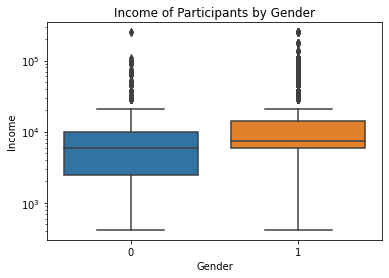

In [22]:
# your code here 
income = pd.read_csv("data/Income_prediction.csv")
ax = sns.boxplot(x='gender', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Gender')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Gender")

**INTERPRETATION:**

**Yes, there is a disparity in income of participants by gender. Male have on average higher income than female.**


<div class='exercise-r'>  

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.

</div>

Text(0.5, 1.0, 'Income of Participants by Eating Habits')

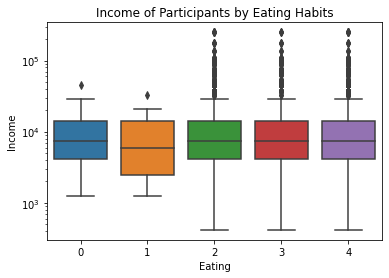

In [23]:
# your code here 
ax = sns.boxplot(x='eating', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Eating')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Eating Habits")

Text(0.5, 1.0, 'Income of Participants by Skin Complexion')

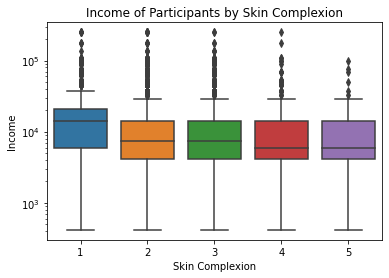

In [24]:
ax = sns.boxplot(x='complexion', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Skin Complexion')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Skin Complexion")

**INTERPRETATION:**

**There is no noticable relationship between eating habits and income. There's a little relationship between skin complexion and income. It shows in the plot above that people with fair skin earn on average more income than those with darker skin. It is preferable to consider skin complexion as a ordinal variable.**


<div class='exercise-r'>  

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

</div>

Text(0.5, 1.0, 'Income of Participants by City')

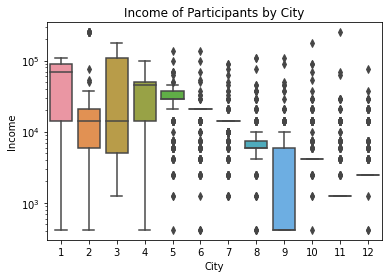

In [25]:
# your code here
ax = sns.boxplot(x='city', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('City')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by City")

**INTERPRETATION:**

**There is a discernable difference in the incomes of participants from difference cities.**


<div class='exercise-r'>  

**5.4** Is there a clear trend between BMI and income?

</div>

Text(0.5, 1.0, 'Income of Participants vs. BMI')

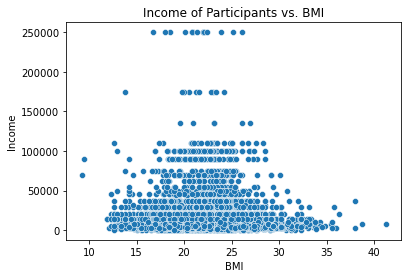

In [26]:
# your code here
ax = sns.scatterplot(x='bmi', y='income', data = income)
ax.set_xlabel('BMI')
ax.set_ylabel('Income')
ax.set_title("Income of Participants vs. BMI")

**INTERPRETATION:**

**No, there seems no clear trend between BMI and income.**


<div class='exercise-r'>  

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

</div>

Text(0.5, 1.0, 'Income of Participants by Education')

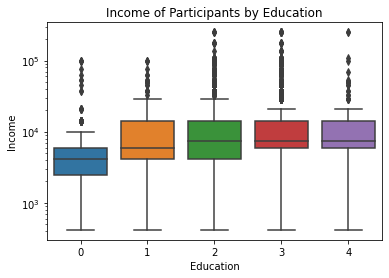

In [27]:
# your code here
ax = sns.boxplot(x='education', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Education")

Text(0.5, 1.0, 'Income of Participants by Education for Male')

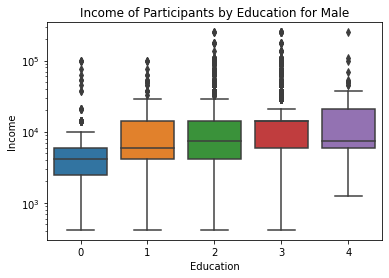

In [28]:
ax = sns.boxplot(x='education', y='income', data = income.loc[income['gender'] == 1,])
ax.set_yscale('log')
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Education for Male")

Text(0.5, 1.0, 'Income of Participants by Education for Female')

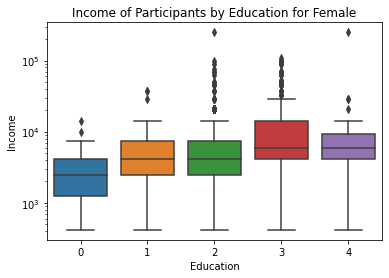

In [29]:
ax = sns.boxplot(x='education', y='income', data = income.loc[income['gender'] == 0,])
ax.set_yscale('log')
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Education for Female")

**INTERPRETATION:**

**Yes, the level of education shows a clear trend with income. People with higher education earn on average more income. Yes, the trend is similar across all levels of gender variables.**


<div class='exercise-r'>  

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

</div>

Text(0.5, 1.0, 'Income of Participants by Family Type')

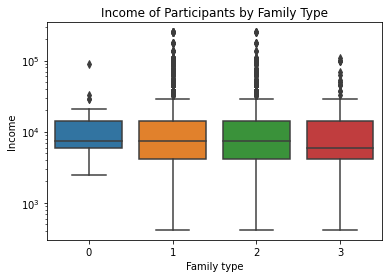

In [30]:
# your code here
ax = sns.boxplot(x='family_type', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Family type')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Family Type")


Text(0.5, 1.0, 'Income of Participants by Social Status')

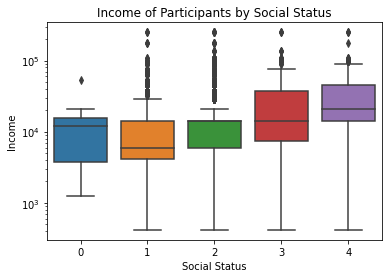

In [31]:
ax = sns.boxplot(x='status', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Social Status')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Social Status")


Text(0.5, 1.0, 'Income of Participants by Manglik')

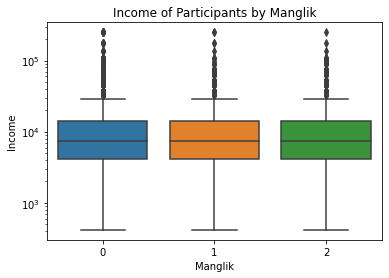

In [32]:

ax = sns.boxplot(x='manglik', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Manglik')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Manglik")


Text(0.5, 1.0, 'Income of Participants by Drinking')

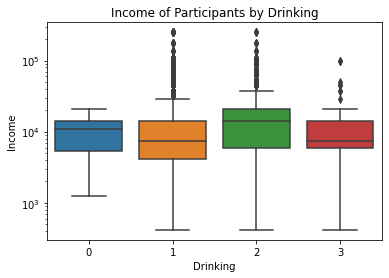

In [33]:

ax = sns.boxplot(x='drinking', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Drinking')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Drinking")


Text(0.5, 1.0, 'Income of Participants by Body Type')

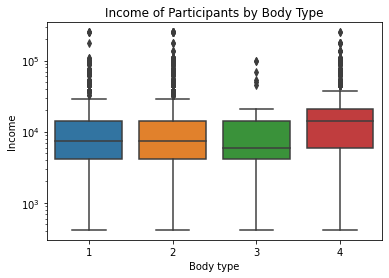

In [34]:
ax = sns.boxplot(x='body', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Body type')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Body Type")

**INTERPRETATION:**

**Education, social status, gender, city, and skin complexion show clear trends with income.**


<div class='exercise-r'>  

**5.7** Is income lower or higher for those living in "nuclear" families?

</div>

Text(0.5, 1.0, 'Income of Participants by Family Type')

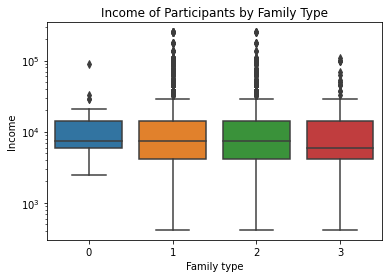

In [35]:
# your code here 
ax = sns.boxplot(x='family_type', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Family type')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Family Type")

**INTERPRETATION:**

**The mean income for those living in nuclear families is higher than "other" types, but equal to "Doesn't matter", and "Joint family".**

<div class='exercise-r'>  

**5.8** What is the average effect of the "Manglik" variable on income?

</div>

Text(0.5, 1.0, 'Income of Participants by Manglik')

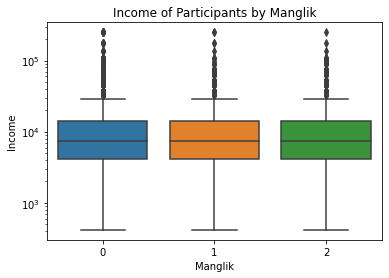

In [36]:
# your code here

ax = sns.boxplot(x='manglik', y='income', data = income)
ax.set_yscale('log')
ax.set_xlabel('Manglik')
ax.set_ylabel('Income')
ax.set_title("Income of Participants by Manglik")


**INTERPRETATION:**

**On average there is no effect of the Manglik variable on income.**


<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Calculate the Gini coefficient [15 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

## Question 6: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

</div>

In [37]:
# your code here
sorted_income = income['income'].sort_values().reset_index()
n = income['income'].shape[0]
nu = 0
de = 0
for i in range(n):
    nu = nu + (2*(i+1) - n - 1)*sorted_income.loc[i,"income"]
    de = de + sorted_income.loc[i,"income"]

gini = nu/(n*de)
print(f"The Gini coefficient is {gini:.4f}.")

The Gini coefficient is 0.4972.


<div class='exercise-r'>  

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

</div>

**The Gini coeffcient of the SimplyMarry.com user base is around 0.50, which is higher than the lowest Gini index in Ukraine and India, and lower than Gini index in South Africa. The Gini coeffcient of the SimplyMarry.com user  base is ranked about 15th according to the world bank estimate. This means the income is not perfectly equal in the SimplyMarry.com user base. Data source, self-report nature of the data, and sampling procedure could introduce bias and affect our conclusion. Gini coefficients are difference from country to country. People who are poor may not want to report their income. Improper sampling procedure could lead to confounding.**


<a id="part7questions"></a>

### <div class='exercise'><b>Question 7 (required for 209a students, optional for others): Multi-linear regression [10 pts]</b></div>

[Return to contents](#contents)

Now we increase the scope of our analysis to solve another problem that is related to income of our SimplyMarry.com users.


![](data/modi.png)

*Image Source: [The Economic Times](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms)*

### Problem Description

Owing to a large number of people underreporting their income to evade taxes, as [reported by The Economic Times in 2017](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms), the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on information commonly available on SimplyMarry.com.

This will help the department flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given SimplyMarry.com dataset, using both the categorical and quantitative predictors available in this dataset.

As with all other homework problems, this is a learning exercise. And, as absurd or problematic as it might seem to use SimplyMarry.com data for this purpose, in the real world, it will be your decision to choose the types of data science projects on which you will work as well as the clients with which you will work. 

### Deliverables

To accomplish this task, we will fit a multiple linear regression model to the training set.

Use the `sklearn` library. Your code should be contained in a Jupyter notebook cell.  An appropriate level of code comments are necessary.  Your code should run and output the required outputs described below.

### Required Outputs

- Fit a multiple linear regression model on the training set and predict on the train and test sets.
- Report the $MSE$ for the train and test set.
- Report the $R^2$ score on the test set.
- Make a plot of residuals vs. log of predicted values $\hat{y}$, with residuals on the $y$-axis and predicted values on the $x$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a histogram of the residuals values.
- Be certain to provide a written interpretation of your findings and any important aspects of your modeling approach of which you'd want the teaching staff to be aware, particularly if you attempt any optional outputs as mentioned below.

### Optional Outputs

You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:

- Polynomial terms for continous variables,
- Interaction terms between variables,
- Feature selection among given predictors.


## Question 7: Solutions 

[Return to contents](#contents)

In [38]:
# your code here


**INTERPRETATION:**

**your answer here**
